# Data Wrangling

## Contents:

* String formatting (f-strings)
* Regular expressions (regex)
* Pandas (Reading/writing CSV)

## String formatting

Instead of writing a series of `print()` statements with multiple arguments, or concatenating (by `+`) strings, you can also use a Python string formatting method, called `f-strings`. More information can be read in PEP 498: https://www.python.org/dev/peps/pep-0498/

You can define a string as a template by inserting `{ }` characters with a variable name or expression in between. For this to work, you have to type an `f` in front of the `'`, `"` or `"""` start of the string definition. When defined, the string will read with the string value of the variable or the expression filled in. 

```python
name = "Joe"
text = f"My name is {name}."
```

Again, if you need a `'` or `"` in your expression, use the other variant in the Python source code to declare the string. Writing:

```python
f'This is my {example}.'
```

is equivalent to:

```python
f"This is my {example}."
```

In [1]:
name = "Joe"
text = f"My name is {name}."

print(text)

My name is Joe.


In [2]:
day = "Monday"
weather = "Sunny"
n_messages = 8

test_dict = {'test': 'test_value'}

text = f"""
Today is {day}. 
The weather is {weather.lower()} and you have {n_messages} unread messages. 
The first three letters of the weekday: {day[:3]}
An example expression is: {15 ** 2 = }



"""

text = f'Test by selecting key: {test_dict["test"]}'


print(text)

Test by selecting key: test_value


---

## Regular expressions

Using regular expressions can be very useful when working with texts. It is a powerful search mechanism by which you can search on patterns, instead of 'exact matches'. But, they can be difficult to grasp, at first sight.

A **regular expression**, for instance, allows you to substitute all digits in a text, following another text sequence, or to find all urls, phone numbers, or email addresses. Or any text, that meets a particular condition.

See the Python manual for the `re` module for more info: https://docs.python.org/3/library/re.html

You can/should use a cheatsheet when writing a regular expression. A nice website to write and test them is: https://regex101.com/. 

Some examples of commonly used expressions:

* `\d` for all digits 0-9
* `\w` for any word character
* `[abc]` for a set of characters (here: a, b, c)
* `.` any character
* `?` the preceding character/pattern 0 or 1 times
* `*` the preceding character/pattern 0 or multiple times
* `+` the preceding character/pattern 1 or multiple times
* `{1,2}` 1 or 2 times
* `^` the start of the string
* `$` the end of the string
* `|` or
* `()` capture group (only return this part)

In many text editors (e.g. VSCode) there is also an option to search (and replace) with the help of regular expressions.

Python has a regex module built in. When working with a regular expression, you have to import it first:

In [3]:
import re

You can use a regular expression for **finding** occurences in a text. Let's say we want to filter out all web urls in a text:

In [4]:
text = """
There are various search engines on the web. 
There is https://www.google.com/, but also https://www.bing.com/. 
A more privacy friendly alternative is https://duckduckgo.com/. 
And who remembers http://www.altavista.com/?
"""

re.findall(r'https?://.+?/', text)

['https://www.google.com/',
 'https://www.bing.com/',
 'https://duckduckgo.com/',
 'http://www.altavista.com/']

In [5]:
# Copied from https://www.imdb.com/search/title/?groups=top_250&sort=user_rating

text = """
1. The Shawshank Redemption (1994)
12 | 142 min | Drama

 9,3  Rate this 80 Metascore
Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.

Director: Frank Darabont | Stars: Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler

Votes: 2.355.643 | Gross: $28.34M

2. The Godfather (1972)
16 | 175 min | Crime, Drama

 9,2  Rate this 100 Metascore
An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.

Director: Francis Ford Coppola | Stars: Marlon Brando, Al Pacino, James Caan, Diane Keaton

Votes: 1.630.157 | Gross: $134.97M

3. The Dark Knight (2008)
16 | 152 min | Action, Crime, Drama

 9,0  Rate this 84 Metascore
When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.

Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine

Votes: 2.315.134 | Gross: $534.86M
"""

titles = re.findall(r'\d{1,2}\. (.+)', text)
titles

['The Shawshank Redemption (1994)',
 'The Godfather (1972)',
 'The Dark Knight (2008)']

### Quiz
Try to get a list of all directors. And the gross income.

In [6]:
# All directors

In [7]:
# Gross income

Or, you can use a regular expression to **replace** a character sequence. This is an equivalent to the `.replace()` function, but allows more variance in the string matching.

In [8]:
text = """
Tim Robbins
Morgan Freeman
Bob Gunton
William Sadler
Marlon Brando
Al Pacino
James Caan
Diane Keaton
Christian Bale
Heath Ledger
Aaron Eckhart
Michael Caine
"""

# Hint: test this with https://regex101.com/
new_text = re.sub(r"(?:(\w)\w+) (\w+)", r"\1. \2", text)

print(new_text)


T. Robbins
M. Freeman
B. Gunton
W. Sadler
M. Brando
A. Pacino
J. Caan
D. Keaton
C. Bale
H. Ledger
A. Eckhart
M. Caine



---

# Data wrangling with Pandas

## CSV (in Pandas)

The other often used file type is CSV (Comma Separated Values), or variants, such as TSV (Tab Separated Values). Python includes another built-in module to deal with these files: the `csv` module. But, we will be using the `Pandas` module, the go-to package for data analysis, that you already imported and updated in Notebook 0. 

A CSV file is similar to an Excel or Google Docs spreadsheet, but more limited in markup and functionality (e.g. you cannot store Excel functions). It is just a text file in which individual entries correspond to lines, and columns are separated by a comma. You can always open a CSV file with a text editor, and this also makes it so easy to store and share data with.

For the rest of the notebook we will see how to work with the two main data types in `pandas`: the `DataFrame` and a `Series`.

Information on functions and modules of Pandas cannot be found in the Python manual online, as it is an external package. Instead, you can refer to https://pandas.pydata.org/pandas-docs/stable/index.html .

### `DataFrame`


What is a `pandas.DataFrame`? 

A `DataFrame` is a collection of `Series` having the same length and whose indexes are in sync. A *collection* means that each column of a dataframe is a series. You can also see it as a spreadheet in memory, that also allows for inclusion of Python objects.

We first have to import the package. It's a convention to do this like so with Pandas, which makes the elements from this package (classes, functions, methods) available under its abbreviation `pd`:

In [9]:
import pandas as pd

Next is loading the data. The following data comes from Wikipedia and was [automatically](https://query.wikidata.org/#%0ASELECT%20DISTINCT%20%3FmovieLabel%20%3Fimdb%20%28MIN%28%3FpublicationYear%29%20as%20%3Fyear%29%20%28year%28%3Fdate%29%20as%20%3Faward_year%29%20%28group_concat%28DISTINCT%20%3FdirectorLabel%3Bseparator%3D%22%2C%20%22%29%20as%20%3Fdirectors%20%29%20%28group_concat%28DISTINCT%20%3FcompanyLabel%3Bseparator%3D%22%2C%20%22%29%20as%20%3Fcompanies%29%20%3Fmale_cast%20%3Ffemale_cast%20WHERE%20%7B%0A%20%20%0A%20%20%7B%0A%20%20%3Fmovie%20p%3AP166%20%3Fawardstatement%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP345%20%3Fimdb%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP577%20%3Fpublication%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP57%20%3Fdirector%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP272%20%3Fcompany%20%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP31%20wd%3AQ11424%20.%0A%20%20%0A%20%20%3Fawardstatement%20ps%3AP166%20wd%3AQ102427%20%3B%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20pq%3AP585%20%3Fdate%20.%0A%20%20%7D%0A%20%20%0A%20%20BIND%28year%28%3Fpublication%29%20as%20%3FpublicationYear%29%0A%20%20%0A%20%20%7B%0A%20%20%20%20%20SELECT%20%3Fmovie%20%28COUNT%28%3Fcast_member%29%20AS%20%3Fmale_cast%29%20WHERE%20%7B%0A%20%20%20%20%20%20%3Fmovie%20wdt%3AP161%20%3Fcast_member%20.%0A%20%20%20%20%20%20%3Fcast_member%20wdt%3AP21%20wd%3AQ6581097%20.%0A%20%20%20%20%7D%20GROUP%20BY%20%3Fmovie%0A%7D%20%7B%0A%20%20%20%20SELECT%20%3Fmovie%20%28COUNT%28%3Fcast_member%29%20AS%20%3Ffemale_cast%29%20WHERE%20%7B%0A%20%20%20%20%20%20%3Fmovie%20wdt%3AP161%20%3Fcast_member%20.%0A%20%20%20%20%20%20%3Fcast_member%20wdt%3AP21%20wd%3AQ6581072%20.%0A%20%20%20%20%7D%20GROUP%20BY%20%3Fmovie%0A%20%20%7D%0A%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%20%20%3Fmovie%20rdfs%3Alabel%20%3FmovieLabel%20.%0A%20%20%20%20%3Fdirector%20rdfs%3Alabel%20%3FdirectorLabel%20.%0A%20%20%20%20%3Fcompany%20rdfs%3Alabel%20%3FcompanyLabel%20.%20%0A%20%20%7D%0A%7D%20%0A%0AGROUP%20BY%20%3FmovieLabel%20%3Fimdb%20%3Fdate%20%3Fmale_cast%20%3Ffemale_cast%0AORDER%20BY%20%3Fyear%20) retreived. It is an overview of all movies that have won an Academy Award for Best Picture, including some extra data for the movie: a link to the IMDB, the publication and award year, the director(s), production company and the number of male and female actors in the cast. It can be that this data is incorrect, because this information is not entered in Wikipedia. 

You can find this file in `data/academyawards.csv`. Download it from the repository and save it in the data folder if you don't have it.

Reading in a csv with pandas is easy. We call the `pd.read_csv()` function with the file path as argument. Pandas takes care of opening and closing the file, so a `with` statement is not needed. The contents of the csv file are then read in a Pandas DataFrame object. We can store this in the variable `df`. 

Calling this variable in a Jypyter Notebook gives back a nicely formatted table with the first and last 5 rows of the file.

In [10]:
df = pd.read_csv('data/academyawards.csv', encoding='utf-8')
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


Think of a `DataFrame` as an in-memory spreadsheet that you can analyse and manipulate programmatically. Or, think of it as a table in which every line is a data entry, and every column holds specific information on this data.

These columns can also be seen as lists of values. They are ordered and the index of an element corresponds with the index of the data entry. The collection of all such columns is what makes the DataFrame. One column in a table is represented by a Pandas `Series`, which collects observations about a given variable. Multiple columns are a `DataFrame`. A DataFrame therefore is a collection of lists (=columns), or `Series`.

If you look for other methods on `pd` you can call, you'll also see that there is an `pd.read_excel()` option to read spreadsheets in `.xls` or `.xlsx`. You can also  use this, if you have these kind of files.

### Statistics
Now that we loaded our DataFrame, we can make pandas print some statistics on the file.

In [11]:
df.head(1)  # First 5 rows

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5


In [12]:
df.tail()  # Last 5 rows

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1
84,Parasite,tt6751668,2019,2020,Bong Joon-ho,"CJ Entertainment, Barunson E&A",5,5


In [13]:
df.describe()  # Descriptive statistics

,year,award_year,male_cast,female_cast
count,85.000000,85.000000,85.000000,85.000000
mean,1974.164706,1975.164706,16.858824,5.835294
std,27.288951,27.350828,12.125488,4.369393
min,1927.000000,1929.000000,4.000000,1.000000
25%,1950.000000,1951.000000,9.000000,3.000000
50%,1975.000000,1976.000000,14.000000,5.000000
75%,1998.000000,1999.000000,21.000000,7.000000
max,2019.000000,2020.000000,89.000000,29.000000


As you can see by what they return, these methods return another DataFrame with some descriptive statistics on the file, such as the number of entries (count), the mean of the numerical values, the standard deviation, minimum and maximum values, and the 25th, 50th, and 75th percentiles.

The `.info()` method can also be informative. It gives you information about a dataframe:
- how much space does it take in memory?
- what is the datatype of each column?
- how many records are there?
- how many `null` values does each column contain (!)?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        85 non-null     object
 1   imdb         85 non-null     object
 2   year         85 non-null     int64 
 3   award_year   85 non-null     int64 
 4   directors    85 non-null     object
 5   companies    85 non-null     object
 6   male_cast    85 non-null     int64 
 7   female_cast  85 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 5.4+ KB


Pandas automatically interprets which datatypes are used in the file, but this is not always correct. Especially if you have empty fields in the DataFrame, any other integers get interpreted as float. Every column has one datatype. You can check them separately by requesting the `.dtypes` argument on the `df`. 

The 'object' type is a string in this file, 'int64' is an integer.

In [15]:
df.dtypes

movie          object
imdb           object
year            int64
award_year      int64
directors      object
companies      object
male_cast       int64
female_cast     int64
dtype: object

We expect different datatypes for the description-dataframe:

In [16]:
description_df = df.describe()
description_df.dtypes

year           float64
award_year     float64
male_cast      float64
female_cast    float64
dtype: object

### Slicing and selecting

#### `df['column1']`
You can select a single column by calling this column name as if the DataFrame was a dictionary. A single column from a DataFrame returns a `Series` object.

In [17]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


In [18]:
print(type(df['movie']))

df['movie']

<class 'pandas.core.series.Series'>


0                              Wings
1                The Broadway Melody
2     All Quiet on the Western Front
3                           Cimarron
4                        Grand Hotel
                   ...              
80                         Spotlight
81                         Moonlight
82                The Shape of Water
83                        Green Book
84                          Parasite
Name: movie, Length: 85, dtype: object

The `Series` object is very similar to a `list`:

In [19]:
movies = df['movie']

print("Length:", len(movies))
print()

for n, movie in enumerate(movies[:10], 1):
    print(n, movie, sep='\t')

Length: 85

1	Wings
2	The Broadway Melody
3	All Quiet on the Western Front
4	Cimarron
5	Grand Hotel
6	It Happened One Night
7	Mutiny on the Bounty
8	The Great Ziegfeld
9	The Life of Emile Zola
10	You Can't Take It With You


#### `df[['column1', 'column2']]`
We can also slice a DataFrame by calling multiple column names as one list:

In [20]:
df[['movie', 'imdb']]

,movie,imdb
0,Wings,tt0018578
1,The Broadway Melody,tt0019729
2,All Quiet on the Western Front,tt0020629
3,Cimarron,tt0021746
4,Grand Hotel,tt0022958
...,...,...
80,Spotlight,tt1895587
81,Moonlight,tt4975722
82,The Shape of Water,tt5580390
83,Green Book,tt6966692


### Looping over DataFrames

You might expect that if you loop through a DataFrame, you get all the rows. Sadly, it is not that simple, because we now have data in two dimensions. We instead get all the column names (or the first row of the dataframe):

In [21]:
for r in df:
    print(r)

movie
imdb
year
award_year
directors
companies
male_cast
female_cast


#### `zip(df['column1', df['column2')`
Going over these items in a `for` loop needs a different approach. The built-in `zip()` function ([manual](https://docs.python.org/3/library/functions.html#zip)) takes two iterables of even length and creates a new iterable of tuples. The number of arguments/iterables that you give to `zip()` determines the length of the tuples.

In [22]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

list(zip(list1, list2))

[('a', 1), ('b', 2), ('c', 3)]

In [23]:
n = 0
for movie, imdb in zip(df['movie'], df['imdb']):
    
    if n > 9:
        break  # stop flooding the Notebook
    
    print(movie, "http://www.imdb.com/title/" + imdb, sep='\t')
    n += 1

Wings	http://www.imdb.com/title/tt0018578
The Broadway Melody	http://www.imdb.com/title/tt0019729
All Quiet on the Western Front	http://www.imdb.com/title/tt0020629
Cimarron	http://www.imdb.com/title/tt0021746
Grand Hotel	http://www.imdb.com/title/tt0022958
It Happened One Night	http://www.imdb.com/title/tt0025316
Mutiny on the Bounty	http://www.imdb.com/title/tt0026752
The Great Ziegfeld	http://www.imdb.com/title/tt0027698
The Life of Emile Zola	http://www.imdb.com/title/tt0029146
You Can't Take It With You	http://www.imdb.com/title/tt0030993


#### `.to_dict(orient='record')`
Or, accessing all entries in a convenient way, as a python dictionary for instance, can be done with the `.to_dict(orient='records')` method:

In [24]:
df.head(1)

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5


In [25]:
for r in df.to_dict(orient='records'):
    
    print(r)
    print()
    
    name = r['movie']
    year = r['year']
    won = r['award_year']
    
    print("The movie " + name + " was produced in " + str(year) + " and won in " + str(won) + ".")
    
    print()
    
    break  # To not flood the notebook, only print the first

{'movie': 'Wings', 'imdb': 'tt0018578', 'year': 1927, 'award_year': 1929, 'directors': 'William A. Wellman, Harry d’Abbadie d’Arrast', 'companies': 'Paramount Pictures', 'male_cast': 12, 'female_cast': 5}

The movie Wings was produced in 1927 and won in 1929.



#### `.iterrows()`
Or you can use the `.iterrows()` method, which gives you tuples of the index of the row, and the row itself as `Series` object:

In [26]:
for n, r in df.iterrows():
    
    name = r.movie  # You can use a dot notation here
    year = r.year
    won = r.award_year
    
    print(f"The movie {name} was produced in {year} and won in {won}.")
    
    print()
    
    break  # To not flood the notebook, only print the first

The movie Wings was produced in 1927 and won in 1929.



---

### Analysis

In [27]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


In [28]:
df.mean()

/tmp/ipykernel_25172/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


year           1974.164706
award_year     1975.164706
male_cast        16.858824
female_cast       5.835294
dtype: float64

You already saw above that you could get statistics by calling `.describe()` on a DataFrame. You can also get these metrics for individual columns. Let's ask the maximum number of male and female actors in the cast of a movie:

In [29]:
df['female_cast'].max()

29

In [30]:
df['male_cast'].max()

89

You can also apply these operations to multiple columns at once. You get a `Series` object back.

In [31]:
df.max()

movie          You Can't Take It With You
imdb                            tt6966692
year                                 2019
award_year                           2020
directors                   William Wyler
companies       Woodfall Film Productions
male_cast                              89
female_cast                            29
dtype: object

In [32]:
df[['male_cast', 'female_cast']]

,male_cast,female_cast
0,12,5
1,4,3
2,22,6
3,13,6
4,19,8
...,...,...
80,15,2
81,6,2
82,8,3
83,7,1


In [33]:
slice_df = df[['male_cast', 'female_cast']]

slice_df.max()

male_cast      89
female_cast    29
dtype: int64

To find the corresponding movie title, we can ask Pandas to give us the record in which these maxima occur. This is done through `df.loc`. This works by asking: "Give me all the locations (=rows) for which a value in a specified column is equal to this value".

In [34]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


In [35]:
df[['male_cast', 'female_cast']].max()

male_cast      89
female_cast    29
dtype: int64

In [36]:
df[df['female_cast'] > 10]

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
7,The Great Ziegfeld,tt0027698,1936,1937,Robert Zigler Leonard,Metro-Goldwyn-Mayer,22,17
10,Gone with the Wind,tt0031381,1939,1940,"George Cukor, Victor Fleming, Sam Wood","Metro-Goldwyn-Mayer, Selznick International Pi...",52,20
34,The Sound of Music,tt0059742,1965,1966,Robert Wise,20th Century Studios,7,14
41,The Godfather Part II,tt0071562,1974,1975,Francis Ford Coppola,Paramount Pictures,33,12
58,Schindler's List,tt0108052,1993,1994,"Steven Spielberg, Marek Brodzki",Amblin Entertainment,35,11
59,Forrest Gump,tt0109830,1994,1995,Robert Zemeckis,Paramount Pictures,89,29
70,Crash,tt0375679,2004,2006,Paul Haggis,"Lionsgate, DEJ Productions, Yari Film Group",16,12
76,The Artist,tt1655442,2011,2012,Michel Hazanavicius,"France 3, Wild Bunch",19,11
79,Birdman,tt2562232,2014,2015,Alejandro González Iñárritu,"Searchlight Pictures, Worldview Entertainment",13,11


In [37]:
for column_name, value in df[['male_cast', 'female_cast']].max().items():
    
    print("Movie with maximum for", column_name, value)
    
    row = df.loc[df[column_name] == value]
    
    print(row.movie)
    
    print()

Movie with maximum for male_cast 89
59    Forrest Gump
Name: movie, dtype: object

Movie with maximum for female_cast 29
59    Forrest Gump
Name: movie, dtype: object



Other functions that can be used are for instance `.mean()`, `.median()`, `.std()` and `.sum()`.

In [38]:
df['female_cast'].mean()

5.8352941176470585

In [39]:
df['male_cast'].mean()

16.858823529411765

In [40]:
df['female_cast'].sum()

496

In [41]:
df['male_cast'].sum()

1433

In [42]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927,1929,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929,1930,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930,1930,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931,1931,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932,1932,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015,2016,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016,2017,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017,2018,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018,2019,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


Pandas also understands dates, but you have to tell it to interpret a column as such. We can change the `year` column in-place so that it is not interpreted as integer, but as a date object. 

In this case, since we only have the year available, and not a full date such as `2021-02-22` (YYYY-mm-dd), we have to specify the format. Typing `%Y` as string is shorthand for `YYYY`. It returns a full date, so every month and day are set to January first.

In [43]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

df['award_year'] = pd.to_datetime(df['award_year'], format='%Y')

df['year']

0    1927-01-01
1    1929-01-01
2    1930-01-01
3    1931-01-01
4    1932-01-01
        ...    
80   2015-01-01
81   2016-01-01
82   2017-01-01
83   2018-01-01
84   2019-01-01
Name: year, Length: 85, dtype: datetime64[ns]

In [44]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927-01-01,1929-01-01,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929-01-01,1930-01-01,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930-01-01,1930-01-01,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931-01-01,1931-01-01,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932-01-01,1932-01-01,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015-01-01,2016-01-01,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017-01-01,2018-01-01,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


### Plotting

Let's try to make some graphs from our data, for instance the number of male/female actors over time. 

We now have a year column that is interpreted as time by Pandas. These values can figure as values on a x-axis in a graph. The y-axis would then give info on the number of male and female actors in the movie.

First, we set an **index** for the DataFrame. This determines how the data can be accessed. Normally, this is a range of 0 untill the number of rows. But, you can change this, so that we can analyse the dataframe on a time index.

In [45]:
# Select only what we need
df_actors = df[['award_year', 'male_cast', 'female_cast']]
df_actors

,award_year,male_cast,female_cast
0,1929-01-01,12,5
1,1930-01-01,4,3
2,1930-01-01,22,6
3,1931-01-01,13,6
4,1932-01-01,19,8
...,...,...,...
80,2016-01-01,15,2
81,2017-01-01,6,2
82,2018-01-01,8,3
83,2019-01-01,7,1


In [46]:
df_actors = df_actors.set_index('award_year')
df_actors

,male_cast,female_cast
award_year,,
1929-01-01,12,5
1930-01-01,4,3
1930-01-01,22,6
1931-01-01,13,6
1932-01-01,19,8
...,...,...
2016-01-01,15,2
2017-01-01,6,2
2018-01-01,8,3


Then simply call `.plot()` on your newly created DataFrame!

<AxesSubplot:xlabel='award_year'>

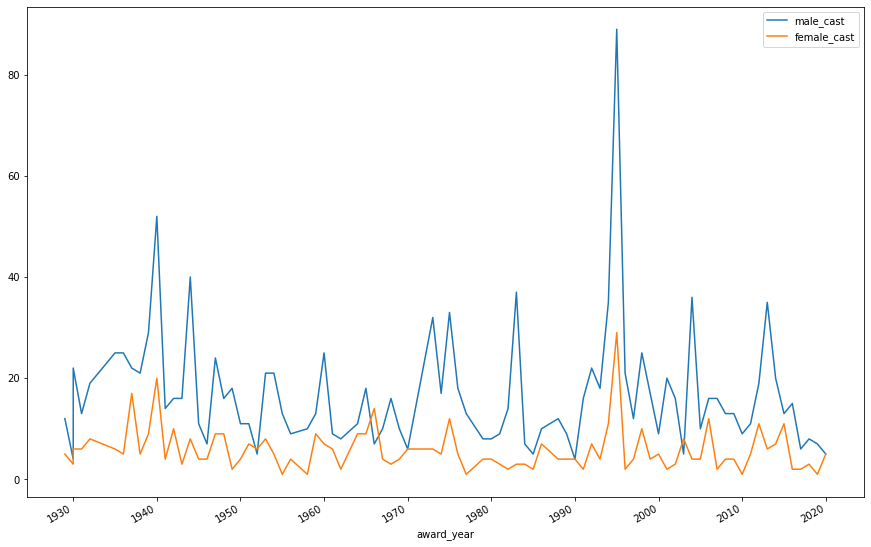

In [47]:
df_actors.plot(figsize=(15,10))

There are tons of parameters, functions, methods, transformations you can use on DataFrames and also on this plotting function. Luckily, plenty of guides and examples can be found on the internet.

### Grouping

In [48]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927-01-01,1929-01-01,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929-01-01,1930-01-01,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930-01-01,1930-01-01,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931-01-01,1931-01-01,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932-01-01,1932-01-01,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015-01-01,2016-01-01,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017-01-01,2018-01-01,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


Some directors have won multiple Oscars. To find out which, we have to count the number of rows in the DataFrame that include the same director. There is a Pandas function for this: `.count()`. Calling this on the DataFrame itself would give us the total number of rows only, per column. Therefore, we have to tell Pandas that we want to group by a particular column, say 'directors'.

In [49]:
df.groupby('directors')

It does not give back something nicely formatted or interpretable. It's just another Python object. The object returned by `groupby` is a `DataFrameGroupBy` **not** a normal `DataFrame`.

However, some methods of the latter work also on the former, e.g. `.head()` and `.tail()`. Let's call the `.count()` on this object:

In [50]:
df.groupby('directors').count()

,movie,imdb,year,award_year,companies,male_cast,female_cast
directors,,,,,,,
Alejandro González Iñárritu,1,1,1,1,1,1,1
Alfred Hitchcock,1,1,1,1,1,1,1
Anthony Minghella,1,1,1,1,1,1,1
Barry Jenkins,1,1,1,1,1,1,1
Barry Levinson,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
"Vincente Minnelli, Charles Walters",1,1,1,1,1,1,1
Wesley Ruggles,1,1,1,1,1,1,1
"William A. Wellman, Harry d’Abbadie d’Arrast",1,1,1,1,1,1,1


Remember that this counts the numer of rows. As we know that each row is one movie, we can trim this down to:

In [51]:
director_counts = df.groupby('directors').count()['movie']
director_counts

directors
Alejandro González Iñárritu                     1
Alfred Hitchcock                                1
Anthony Minghella                               1
Barry Jenkins                                   1
Barry Levinson                                  1
                                               ..
Vincente Minnelli, Charles Walters              1
Wesley Ruggles                                  1
William A. Wellman, Harry d’Abbadie d’Arrast    1
William Dieterle                                1
William Wyler                                   3
Name: movie, Length: 76, dtype: int64

Now, get all directors that have won an Oscar more than once by specifying a conditional operator:

In [52]:
director_counts[director_counts > 1]

directors
Billy Wilder            2
Clint Eastwood          2
Elia Kazan              2
Francis Ford Coppola    2
Frank Capra             2
Fred Zinnemann          2
Miloš Forman            2
William Wyler           3
Name: movie, dtype: int64

In [53]:
list(director_counts.items())

[('Alejandro González Iñárritu', 1),
 ('Alfred Hitchcock', 1),
 ('Anthony Minghella', 1),
 ('Barry Jenkins', 1),
 ('Barry Levinson', 1),
 ('Ben Affleck', 1),
 ('Bernardo Bertolucci', 1),
 ('Billy Wilder', 2),
 ('Bong Joon-ho', 1),
 ('Bruce Beresford', 1),
 ('Carol Reed', 1),
 ('Cecil B. DeMille', 1),
 ('Clint Eastwood', 2),
 ('Danny Boyle, Loveleen Tandan', 1),
 ('David Lean', 1),
 ('Delbert Mann, Paul Helmick', 1),
 ('Edmund Goulding', 1),
 ('Elia Kazan', 2),
 ('Francis Ford Coppola', 2),
 ('Frank Capra', 2),
 ('Frank Lloyd', 1),
 ('Fred Zinnemann', 2),
 ('George Cukor', 1),
 ('George Cukor, Victor Fleming, Sam Wood', 1),
 ('George Roy Hill', 1),
 ('Guillermo del Toro', 1),
 ('Harry Beaumont', 1),
 ('Hugh Hudson', 1),
 ('James Cameron', 1),
 ('James L. Brooks', 1),
 ('Joel Coen, Ethan Coen', 1),
 ('John Ford', 1),
 ('John G. Avildsen', 1),
 ('John Madden', 1),
 ('John Schlesinger', 1),
 ('Jonathan Demme', 1),
 ('Joseph L. Mankiewicz', 1),
 ('Kathryn Bigelow', 1),
 ('Kevin Costner', 1)

In [54]:
for i, value in director_counts.items():
    print(i, value)

Alejandro González Iñárritu 1
Alfred Hitchcock 1
Anthony Minghella 1
Barry Jenkins 1
Barry Levinson 1
Ben Affleck 1
Bernardo Bertolucci 1
Billy Wilder 2
Bong Joon-ho 1
Bruce Beresford 1
Carol Reed 1
Cecil B. DeMille 1
Clint Eastwood 2
Danny Boyle, Loveleen Tandan 1
David Lean 1
Delbert Mann, Paul Helmick 1
Edmund Goulding 1
Elia Kazan 2
Francis Ford Coppola 2
Frank Capra 2
Frank Lloyd 1
Fred Zinnemann 2
George Cukor 1
George Cukor, Victor Fleming, Sam Wood 1
George Roy Hill 1
Guillermo del Toro 1
Harry Beaumont 1
Hugh Hudson 1
James Cameron 1
James L. Brooks 1
Joel Coen, Ethan Coen 1
John Ford 1
John G. Avildsen 1
John Madden 1
John Schlesinger 1
Jonathan Demme 1
Joseph L. Mankiewicz 1
Kathryn Bigelow 1
Kevin Costner 1
Laurence Olivier 1
Leo McCarey 1
Lewis Milestone, Nate Watt 1
Martin Scorsese 1
Mel Gibson 1
Michael Cimino 1
Michael Curtiz 1
Michel Hazanavicius 1
Miloš Forman 2
Norman Jewison 1
Paul Haggis 1
Peter Farrelly 1
Peter Jackson 1
Richard Attenborough 1
Ridley Scott 1
Rob M

### Adding a column

If we want to get the total number of actors per movie, we have to sum the values from the `male_cast` and `female_cast` columns. 

You can do this in a for loop, by going over every row (like we saw above), but you can also sum the individual columns. Pandas will then add up the values with the same index and will return a new Series of the same length with the values summed.

In [55]:
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast
0,Wings,tt0018578,1927-01-01,1929-01-01,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5
1,The Broadway Melody,tt0019729,1929-01-01,1930-01-01,Harry Beaumont,Metro-Goldwyn-Mayer,4,3
2,All Quiet on the Western Front,tt0020629,1930-01-01,1930-01-01,"Lewis Milestone, Nate Watt",Universal Pictures,22,6
3,Cimarron,tt0021746,1931-01-01,1931-01-01,Wesley Ruggles,RKO Pictures,13,6
4,Grand Hotel,tt0022958,1932-01-01,1932-01-01,Edmund Goulding,Metro-Goldwyn-Mayer,19,8
...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015-01-01,2016-01-01,Tom McCarthy,"Anonymous Content, Participant",15,2
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2
82,The Shape of Water,tt5580390,2017-01-01,2018-01-01,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1


In [56]:
df['male_cast'] + df['female_cast']

0     17
1      7
2     28
3     19
4     27
      ..
80    17
81     8
82    11
83     8
84    10
Length: 85, dtype: int64

In [57]:
total_cast = df['male_cast'] + df['female_cast']
total_cast

0     17
1      7
2     28
3     19
4     27
      ..
80    17
81     8
82    11
83     8
84    10
Length: 85, dtype: int64

Then, we add it as a column in our original dataframe. The only requirement for adding a column to a DataFrame is that the length of the Series or list is the same as that of the DataFrame.

In [58]:
df['total_cast'] = total_cast
df

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast,total_cast
0,Wings,tt0018578,1927-01-01,1929-01-01,"William A. Wellman, Harry d’Abbadie d’Arrast",Paramount Pictures,12,5,17
1,The Broadway Melody,tt0019729,1929-01-01,1930-01-01,Harry Beaumont,Metro-Goldwyn-Mayer,4,3,7
2,All Quiet on the Western Front,tt0020629,1930-01-01,1930-01-01,"Lewis Milestone, Nate Watt",Universal Pictures,22,6,28
3,Cimarron,tt0021746,1931-01-01,1931-01-01,Wesley Ruggles,RKO Pictures,13,6,19
4,Grand Hotel,tt0022958,1932-01-01,1932-01-01,Edmund Goulding,Metro-Goldwyn-Mayer,19,8,27
...,...,...,...,...,...,...,...,...,...
80,Spotlight,tt1895587,2015-01-01,2016-01-01,Tom McCarthy,"Anonymous Content, Participant",15,2,17
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2,8
82,The Shape of Water,tt5580390,2017-01-01,2018-01-01,Guillermo del Toro,"Searchlight Pictures, TSG Entertainment",8,3,11
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1,8


Optionally, we can sort the DataFrame by column. For instance, from high to low (`ascending=False`) for the newly created `total_cast` column.

In [59]:
df_sorted = df.sort_values('total_cast', ascending=False)
df_sorted

,movie,imdb,year,award_year,directors,companies,male_cast,female_cast,total_cast
59,Forrest Gump,tt0109830,1994-01-01,1995-01-01,Robert Zemeckis,Paramount Pictures,89,29,118
10,Gone with the Wind,tt0031381,1939-01-01,1940-01-01,"George Cukor, Victor Fleming, Sam Wood","Metro-Goldwyn-Mayer, Selznick International Pi...",52,20,72
13,Casablanca,tt0034583,1942-01-01,1944-01-01,Michael Curtiz,Warner Bros.,40,8,48
58,Schindler's List,tt0108052,1993-01-01,1994-01-01,"Steven Spielberg, Marek Brodzki",Amblin Entertainment,35,11,46
41,The Godfather Part II,tt0071562,1974-01-01,1975-01-01,Francis Ford Coppola,Paramount Pictures,33,12,45
...,...,...,...,...,...,...,...,...,...
54,Driving Miss Daisy,tt0097239,1989-01-01,1990-01-01,Bruce Beresford,Warner Bros.,4,4,8
81,Moonlight,tt4975722,2016-01-01,2017-01-01,Barry Jenkins,"Plan B Entertainment, A24",6,2,8
83,Green Book,tt6966692,2018-01-01,2019-01-01,Peter Farrelly,"Universal Pictures, DreamWorks, Participant, A...",7,1,8
50,Amadeus,tt0086879,1984-01-01,1985-01-01,Miloš Forman,Orion Pictures,5,2,7


### Saving back the file

Use one of the `.to_csv()` or `.to_excel` functions to save the DataFrame. Again, no `with` statement needed, just a file path (and an encoding).

In [60]:
df_sorted.to_csv('stuff/academyawards_sum.csv', encoding='utf-8')

In [61]:
df_sorted.to_excel('stuff/academyawards_sum.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

You need to specify `index=False` if you want to prevent a standard index (0,1,2,3...) to be saved in the file as well.

In [62]:
df_sorted.to_csv('stuff/academyawards_sum.csv', encoding='utf-8', index=False)

Open the contents in Excel, LibreOffice Calc, or another program to read spreadsheets!

---

# Data wrangling (example)

We can take a look at another example. We consider a dataset of tweets from Elon Musk, SpaceX and Tesla founder, and ask the following questions:
* When is Elon most actively tweeting?

While this question is a bit trivial, it will allow us to learn how to wrangle data.

In [63]:
import pandas as pd

### Load dataset

Let's read in a CSV file containing an export of [Elon Musk's tweets](https://twitter.com/elonmusk), exported from Twitter's API.

In [64]:
dataset_path = 'data/elonmusk_tweets.csv'
df = pd.read_csv(dataset_path, encoding='utf-8')

In [65]:
df

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


Let's give this dataset a bit more structure:
- The `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- The column `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value

In [67]:
df.set_index('id', drop=True, inplace=True)

In [68]:
df

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
...,...,...
142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...


In [69]:
df.created_at = pd.to_datetime(df.created_at)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 849636868052275200 to 15434727182
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 66.1+ KB


In [71]:
df

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
...,...,...
142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...


---

### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

In [72]:
df.columns

Index(['created_at', 'text'], dtype='object')

We can change the column names by assigning to `columns` a list having as values the new column names.

```{note}
The size of the list and new number of colums must match!
```

In [73]:
# here we renamed the column `text` => `tweet`
df.columns = ['created_at', 'tweet']

In [74]:
# let's check that the change did take place
df.head()

,created_at,tweet
id,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...


The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [75]:
# let's change column `tweet` => `text`
df = df.rename(columns={"tweet": "text"})

In [76]:
df.head()

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...


**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [77]:
# this selects one single column and returns as a Series
df["created_at"].head()

id
849636868052275200   2017-04-05 14:56:29
848988730585096192   2017-04-03 20:01:01
848943072423497728   2017-04-03 16:59:35
848935705057280001   2017-04-03 16:30:19
848416049573658624   2017-04-02 06:05:23
Name: created_at, dtype: datetime64[ns]

In [78]:
type(df["created_at"])

pandas.core.series.Series

In [79]:
# whereas this syntax selects one single column
# but returns a Dataframe
df[["created_at"]].head()

,created_at
id,
849636868052275200,2017-04-05 14:56:29
848988730585096192,2017-04-03 20:01:01
848943072423497728,2017-04-03 16:59:35
848935705057280001,2017-04-03 16:30:19
848416049573658624,2017-04-02 06:05:23


In [80]:
type(df[["created_at"]])

pandas.core.frame.DataFrame

####  Selecting rows

Filtering rows in `pandas` is done by means of `[ ]`, which can contain the row number as well as a condition for the selection.

In [81]:
df[0:2]

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...


### Transformation


The two main functions used to manipulate and transform values in a dataframe are:
- `.map()` (on Series only!)
- `.apply()`

In this section we'll be using both to enrich our datasets with useful information (useful for exploration, for later visualizations, etc.).

#### Add link to original tweet

The `map()` method can be called on a column, as well as on the dataframe's index.

When passed as a parameter to `map`, an 'anonymous' lambda function `lambda` can be used to transform any value from that column into another one.

In [82]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

Or, maybe it is easier with a list comprehension:

In [83]:
df['tweet_link'] = [f'https://twitter.com/i/web/status/{x}' for x in df.index]

In [84]:
df

,created_at,text,tweet_link
id,,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,https://twitter.com/i/web/status/8496368680522...
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,https://twitter.com/i/web/status/8489887305850...
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",https://twitter.com/i/web/status/8489430724234...
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,https://twitter.com/i/web/status/8489357050572...
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,https://twitter.com/i/web/status/8484160495736...
...,...,...,...
142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,https://twitter.com/i/web/status/1428812840190...
142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",https://twitter.com/i/web/status/1428808713918...
142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,https://twitter.com/i/web/status/1421884581259...


#### Add colums with mentions

In [85]:
import re

def find_mentions(tweet_text):
    """
    Find all @ mentions in a tweet and 
    return them as a list.
    """
    
    regex = r'@[a-zA-Z0-9_]{1,15}'
    mentions = re.findall(regex, tweet_text)
    
    return mentions

In [86]:
df['tweet_mentions'] = df.text.apply(find_mentions)

In [87]:
df['n_mentions'] = df.tweet_mentions.apply(len)

In [88]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions
id,,,,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,https://twitter.com/i/web/status/8496368680522...,[],0
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,https://twitter.com/i/web/status/8489887305850...,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",https://twitter.com/i/web/status/8489430724234...,"[@waltmossberg, @mims, @defcon_5]",3
848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,https://twitter.com/i/web/status/8489357050572...,[],0
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,https://twitter.com/i/web/status/8484160495736...,"[@DaveLeeBBC, @verge]",2


#### Add column with week day and hour

In [89]:
def day_of_week(t):
    """
    Get the week day name from a week day integer.
    """
    
    if t == 0:
        return "Monday"
    elif t == 1:
        return "Tuesday"
    elif t == 2:
        return "Wednesday"
    elif t == 3:
        return "Thursday"
    elif t == 4:
        return "Friday"
    elif t == 5:
        return "Saturday"
    elif t == 6:
        return "Sunday"

In [90]:
df["week_day"] = df.created_at.dt.weekday

In [91]:
df["week_day_name"] = df["week_day"].apply(day_of_week)

Or, there is a built-in function in Pandas that gives back the day name:

In [92]:
df["week_day_name"] = df.created_at.dt.day_name()

In [93]:
df.head(3)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,week_day_name
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,https://twitter.com/i/web/status/8496368680522...,[],0,2,Wednesday
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,https://twitter.com/i/web/status/8489887305850...,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,Monday
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",https://twitter.com/i/web/status/8489430724234...,"[@waltmossberg, @mims, @defcon_5]",3,0,Monday


#### Add column with day hour

In [94]:
df.created_at.dt?

In [95]:
df.created_at.dt.hour.head()

id
849636868052275200    14
848988730585096192    20
848943072423497728    16
848935705057280001    16
848416049573658624     6
Name: created_at, dtype: int64

In [96]:
df["day_hour"] = df.created_at.dt.hour

In [97]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

,created_at,week_day,day_hour
id,,,
849636868052275200,2017-04-05 14:56:29,2,14
848988730585096192,2017-04-03 20:01:01,0,20
848943072423497728,2017-04-03 16:59:35,0,16
848935705057280001,2017-04-03 16:30:19,0,16


##### Multiple conditions

In [98]:
# AND condition with `&`

df[
    (df.week_day_name == 'Saturday') & (df.n_mentions == 0)
].shape

(187, 8)

In [99]:
# Equivalent expression with `query()`

df.query("week_day_name == 'Saturday' and n_mentions == 0").shape

(187, 8)

In [100]:
# OR condition with `|`

df[
    (df.week_day_name == 'Saturday') | (df.n_mentions == 0)
].shape

(1384, 8)

### Aggregation

In [101]:
df.agg({'n_mentions': ['min', 'max', 'sum']})

,n_mentions
min,0
max,6
sum,2277


#### Grouping

In [102]:
group_by_day = df.groupby('week_day')

In [103]:
# The head of a DataFrameGroupBy consists of the first
# n records for each group (see `help(grp_by_day.head)`)

group_by_day.head(1)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,week_day_name,day_hour
id,,,,,,,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,https://twitter.com/i/web/status/8496368680522...,[],0,2,Wednesday,14
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,https://twitter.com/i/web/status/8489887305850...,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,Monday,20
848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,https://twitter.com/i/web/status/8484160495736...,"[@DaveLeeBBC, @verge]",2,6,Sunday,6
848244577521647616,2017-04-01 18:44:01,Why did we waste so much time developing silly...,https://twitter.com/i/web/status/8482445775216...,[],0,5,Saturday,18
847958571895619584,2017-03-31 23:47:32,@BadAstronomer We can def bring it back like D...,https://twitter.com/i/web/status/8479585718956...,[@BadAstronomer],1,4,Friday,23
847594208219336705,2017-03-30 23:39:41,Incredibly proud of the SpaceX team for achiev...,https://twitter.com/i/web/status/8475942082193...,[],0,3,Thursday,23
846772378067648513,2017-03-28 17:14:01,@danahull Very few. We have yet to do a China ...,https://twitter.com/i/web/status/8467723780676...,[@danahull],1,1,Tuesday,17


`agg` is used to pass an aggregation function to be applied to each group resulting from `groupby`.

Here we are interested in how many tweets there are for each group, so we pass `len()` to an 'aggregate'. This is similar to the `.count()` method.

In [104]:
group_by_day.agg(len)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,day_hour
week_day,,,,,,,
0,315,315,315,315,315,315,315
1,385,385,385,385,385,385,385
2,380,380,380,380,380,380,380
3,361,361,361,361,361,361,361
4,530,530,530,530,530,530,530
5,426,426,426,426,426,426,426
6,422,422,422,422,422,422,422


However, we are not interested in having the count for all columns. Rather we want to create a new dataframe with renamed column names.

In [105]:
group_by_day.agg({'text': len}).rename({'text': 'tweet_count'}, axis='columns')

,tweet_count
week_day,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [106]:
groupby_result_as_series = df.groupby('day_hour')['text'].count()

In [107]:
groupby_result_as_series

day_hour
0     144
1     183
2     119
3     104
4      98
5      81
6      85
7      94
8      82
9      55
10     34
11     15
12     17
13     23
14    114
15    190
16    198
17    190
18    162
19    154
20    176
21    192
22    168
23    141
Name: text, dtype: int64

In [108]:
groupby_result_as_df = df.groupby('day_hour')[['text']]\
    .count()\
    .rename({'text': 'count'}, axis='columns')

In [109]:
groupby_result_as_df.head()

,count
day_hour,
0,144
1,183
2,119
3,104
4,98


##### By series or dict

In [110]:
df.groupby?

In [111]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day).agg({'text':len}).head()

,text
created_at,
1,107
2,107
3,114
4,97
5,117


In [112]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day)[['text']].count().head()

,text
created_at,
1,107
2,107
3,114
4,97
5,117


In [113]:
df.groupby(df.created_at.dt.hour)[['text']].count().head()

,text
created_at,
0,144
1,183
2,119
3,104
4,98


##### By multiple labels (columns)

In [114]:
# Here we group based on the values of two columns
# instead of one

x = df.groupby(['week_day', 'day_hour'])[['text']].count()

In [115]:
x.head()

text
week_day day_hour      
0        0           11
         1           23
         2           17
         3            7
         4           12

#### Aggregation methods

**Summary**:

- `count`: Number of non-NA values
- `sum`: Sum of non-NA values
- `mean`: Mean of non-NA values
- `median`: Arithmetic median of non-NA values
- `std`, `var`: standard deviation and variance
- `min`, `max`: Minimum and maximum of non-NA values

You can also use these in an aggregation functions within a groupby:

In [116]:
df.groupby('week_day').agg(
    {
        # each key in this dict specifies
        # a given column
        'n_mentions':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

n_mentions                                      
              count      mean min max       std       var
week_day                                                 
0               315  0.812698   0   5  0.964248  0.929775
1               385  0.729870   0   6  0.874861  0.765381
2               380  0.786842   0   4  0.768328  0.590328
3               361  0.781163   0   4  0.832853  0.693644
4               530  0.879245   0   5  0.901869  0.813368
5               426  0.727700   0   5  0.800607  0.640972
6               422  0.907583   0   6  0.851707  0.725406

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0)

In [117]:
df.sort_values(by='created_at', ascending=True).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,week_day_name,day_hour
id,,,,,,,,
15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",https://twitter.com/i/web/status/15434727182,[],0,4,Friday,18
142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,https://twitter.com/i/web/status/1421799282034...,[],0,3,Thursday,9
142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...,https://twitter.com/i/web/status/1421884581259...,[],0,3,Thursday,10
142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",https://twitter.com/i/web/status/1428808713918...,[],0,5,Saturday,8
142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,https://twitter.com/i/web/status/1428812840190...,[],0,5,Saturday,8


In [118]:
df.sort_values(by='n_mentions', ascending=False).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,week_day_name,day_hour
id,,,,,,,,
752721031735812096,2016-07-12 04:27:33,@kumailn @RealDaveBarton @JuddApatow @SiliconH...,https://twitter.com/i/web/status/7527210317358...,"[@kumailn, @RealDaveBarton, @JuddApatow, @Sili...",6,1,Tuesday,4
303244501957365760,2013-02-17 20:48:17,RT @LawrenceChanin: @TeslaRoadTrip @avantgame ...,https://twitter.com/i/web/status/3032445019573...,"[@LawrenceChanin, @TeslaRoadTrip, @avantgame, ...",6,6,Sunday,20
845289977051148289,2017-03-24 15:03:29,@faultywarrior @matt_trulli @FredericLambert @...,https://twitter.com/i/web/status/8452899770511...,"[@faultywarrior, @matt_trulli, @FredericLamber...",5,4,Friday,15
672792504895434753,2015-12-04 15:00:07,RT @WSJLife: Supermodel @KarlieKloss blasts of...,https://twitter.com/i/web/status/6727925048954...,"[@WSJLife, @KarlieKloss, @elonmusk, @spacex, @...",5,4,Friday,15
191005784862236672,2012-04-14 03:31:42,RT @SethGreen: My love @ClareGrant & @elonmusk...,https://twitter.com/i/web/status/1910057848622...,"[@SethGreen, @ClareGrant, @elonmusk, @SpaceX, ...",5,5,Saturday,3


### Save

Before continuing with the plotting, let's save our enhanced dataframe, so that we can come back to it without having to redo the same manipulations on it.

`pandas` provides a number of handy functions to export dataframes in a variety of formats.

Here we use `.to_pickle()` to serialize the dataframe into a binary format, by using behind the scenes Python's `pickle` library.

In [119]:
df.to_pickle("stuff/musk_tweets_enhanced.pickle")

## Part 2

In [120]:
df = pd.read_pickle("stuff/musk_tweets_enhanced.pickle")

### `describe()`

The default behavior is to include only column with numerical values

In [121]:
df.describe()

,n_mentions,week_day,day_hour
count,2819.000000,2819.000000,2819.000000
mean,0.807733,3.196169,12.782547
std,0.859091,1.946637,7.611198
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000
50%,1.000000,3.000000,15.000000
75%,1.000000,5.000000,19.000000
max,6.000000,6.000000,23.000000


A trick to include more values is to exclude the datatype on which it breaks, which in our case is `list`.

In [122]:
df.describe(exclude=[list])

/tmp/ipykernel_25172/4047585927.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[list])


,created_at,n_mentions,week_day,day_hour
count,2819,2819.000000,2819.000000,2819.000000
unique,2819,NaN,NaN,NaN
top,2017-04-05 14:56:29,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,2010-06-04 18:31:57,NaN,NaN,NaN
last,2017-04-05 14:56:29,NaN,NaN,NaN
mean,NaN,0.807733,3.196169,12.782547
std,NaN,0.859091,1.946637,7.611198
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,2.000000,5.000000


In [123]:
df.created_at.describe(datetime_is_numeric=True)

count                             2819
mean     2015-03-24 20:24:24.578928896
min                2010-06-04 18:31:57
25%                2013-06-28 18:27:19
50%                2015-10-21 23:14:33
75%                2016-08-30 04:08:30
max                2017-04-05 14:56:29
Name: created_at, dtype: object

In [124]:
df['week_day_name'] = df['week_day_name'].astype('category')

In [125]:
df.describe(exclude=['object'])

/tmp/ipykernel_25172/1424112182.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=['object'])


,created_at,n_mentions,week_day,week_day_name,day_hour
count,2819,2819.000000,2819.000000,2819,2819.000000
unique,2819,NaN,NaN,7,NaN
top,2017-04-05 14:56:29,NaN,NaN,Friday,NaN
freq,1,NaN,NaN,530,NaN
first,2010-06-04 18:31:57,NaN,NaN,NaN,NaN
last,2017-04-05 14:56:29,NaN,NaN,NaN,NaN
mean,NaN,0.807733,3.196169,NaN,12.782547
std,NaN,0.859091,1.946637,NaN,7.611198
min,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,0.000000,2.000000,NaN,5.000000


### Plotting

In [126]:
# Not needed in newest Pandas version
%matplotlib inline 

import matplotlib.pyplot as plt

#### Histograms

They are useful to see the distribution of a certain variable in your dataset.

In [127]:
df.groupby(['n_mentions'])[['text']].count()

,text
n_mentions,
0,1145
1,1231
2,329
3,78
4,28
5,6
6,2


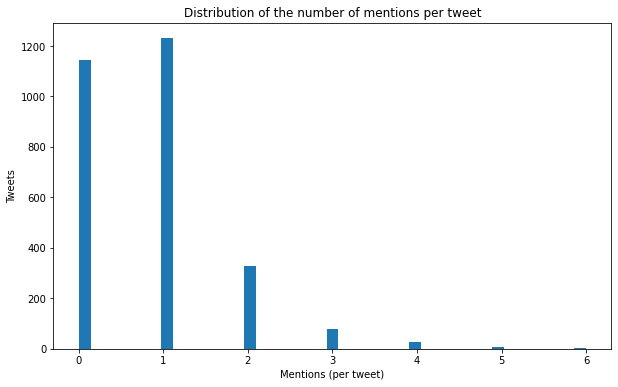

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(df.n_mentions, bins='auto', rwidth=1.0)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Mentions (per tweet)")
plt.show()

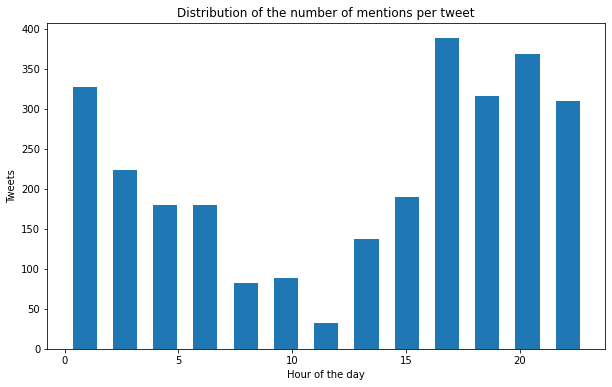

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(df.day_hour, bins='auto', rwidth=0.6)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

In [130]:
df_2017 = df[df.created_at.dt.year == 2017]

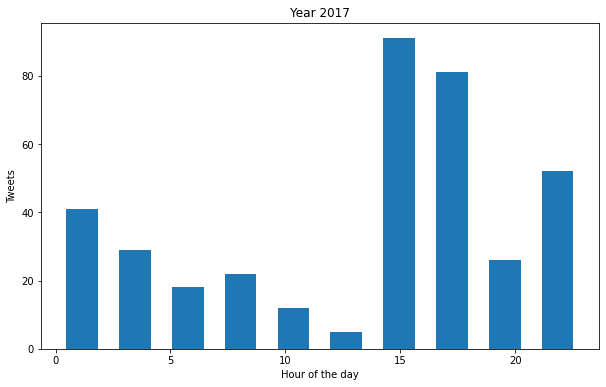

In [131]:
plt.figure(figsize=(10, 6))
plt.hist(df_2017.day_hour, bins='auto', rwidth=0.6)
plt.title('Year 2017')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

So far we have used directly `matplotlib` to generate our plots.

`pandas`'s dataframes provide some methods that directly call `matplotlib`'s API behind the scenes:
- `hist()` for histograms
- `boxplot()` for boxplots
- `plot()` for other types of plots (specified with e.g. `any='scatter'`)

By passing the `by` parameter to e.g. `hist()` it is possible to produce one histogram plot of a given variable for each value in another column.

Let's see how we can plot the number of mentions by year:

In [132]:
df['year'] = df.created_at.dt.year

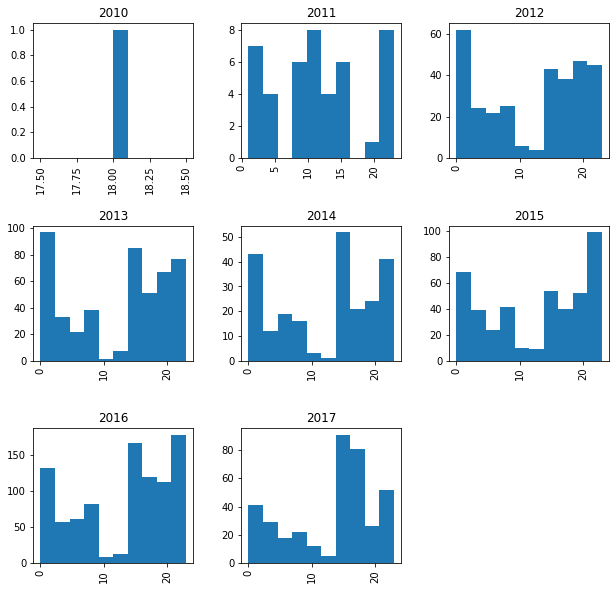

In [133]:
axes = df.hist(column='day_hour', by='year', figsize=(10,10))

#### Bar charts

They are useful to plot categorical data.

In [134]:
plt.bar?

In [135]:
tweets_by_weekday = df.groupby(df.created_at.dt.weekday)[['text']].count()

In [136]:
week_days = [
    "Mon",
    "Tue",
    "Wed",
    "Thur",
    "Fri",
    "Sat",
    "Sun"
]

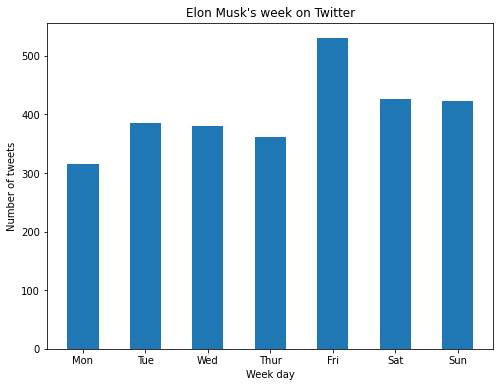

In [137]:
plt.figure(figsize=(8, 6))

# specify the type of plot and the labels
# for the y axis (the bars)
plt.bar(
    tweets_by_weekday.index,
    tweets_by_weekday.text,
    tick_label=week_days,
    width=0.5
)

# give a title to the plot
plt.title('Elon Musk\'s week on Twitter')

# give a label to the axes
plt.ylabel("Number of tweets")
plt.xlabel("Week day")
plt.show()

#### Box plots

```{image} images/eda-boxplot.png
:alt: edaboxplot
```

### Outliers, missing values

An *outlier* is an observation far from the center of mass of the distribution. It might be an error or a genuine observation: this distinction requires domain knowledge. Outliers infuence the outcomes of several statistics and machine learning methods: it is important to decide how to deal with them.

A *missing value* is an observation without a value. There can be many reasons for a missing value: the value might not exist (hence its absence is informative and it should be left empty) or might not be known (hence the value is existing but missing in the dataset and it should be marked as NA).

```{admonition} Tip
:class: tip
One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.
```

In [138]:
tweets_by_weekday

,text
created_at,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


In [139]:
tweets_by_weekday.describe()

,text
count,7.000000
mean,402.714286
std,67.551744
min,315.000000
25%,370.500000
50%,385.000000
75%,424.000000
max,530.000000


<AxesSubplot:>

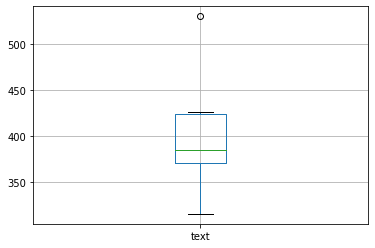

In [140]:
tweets_by_weekday.boxplot()

In [141]:
plt.bar?

In [142]:
df.head(3)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,week_day_name,day_hour,year
id,,,,,,,,,
849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,https://twitter.com/i/web/status/8496368680522...,[],0,2,Wednesday,14,2017
848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,https://twitter.com/i/web/status/8489887305850...,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,Monday,20,2017
848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",https://twitter.com/i/web/status/8489430724234...,"[@waltmossberg, @mims, @defcon_5]",3,0,Monday,16,2017


In [143]:
df[['day_hour']].describe()

,day_hour
count,2819.000000
mean,12.782547
std,7.611198
min,0.000000
25%,5.000000
50%,15.000000
75%,19.000000
max,23.000000


In [144]:
df[['day_hour']].quantile(.25)

day_hour    5.0
Name: 0.25, dtype: float64

In [145]:
df.boxplot?

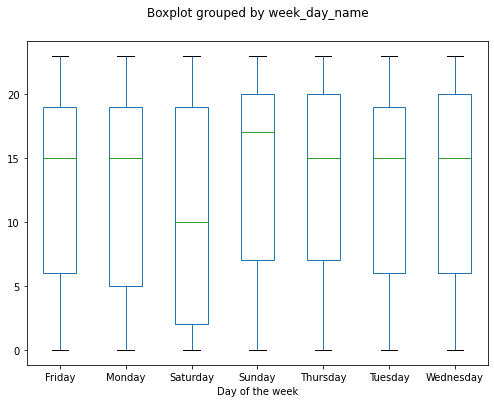

In [146]:
df[['day_hour', 'week_day_name']].boxplot(
    by='week_day_name',
    grid=False,
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

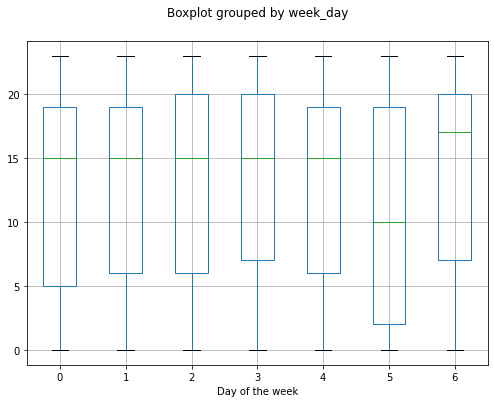

In [147]:
df[['day_hour', 'week_day']].boxplot(
    by='week_day',
    grid=True, # just to show the difference with/without
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

### Exercise 1.

* Create a function that calculates the frequency of hashtags in tweets.
* Test it on toy examples, to make sure it works.
* Apply it to Elon Musk's tweets.
* List the top 10 hashtags in the dataset.

In [148]:
# Your code here.

### Exercise 2.

Read the file `data/adams-hhgttg.txt` and:

- Count the number of occurrences per distinct word in the text.

- Create a data frame with two columns: word and counts.

- Plot the histogram of the word frequencies and think about what is happening.

In [149]:
# Your code here.

---